In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('Sample - Superstore.csv', encoding='latin-1')

# basic inspect

In [7]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [9]:
df.shape

(9994, 21)

In [10]:
df.describe

<bound method NDFrame.describe of       Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
1          2  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
2          3  CA-2016-138688   6/12/2016   6/16/2016    Second Class   
3          4  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
4          5  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
...      ...             ...         ...         ...             ...   
9989    9990  CA-2014-110422   1/21/2014   1/23/2014    Second Class   
9990    9991  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9991    9992  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9992    9993  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9993    9994  CA-2017-119914    5/4/2017    5/9/2017    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520    

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [15]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [16]:
df.nunique()

Row ID           9994
Order ID         5009
Order Date       1237
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Postal Code       631
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            5825
Quantity           14
Discount           12
Profit           7287
dtype: int64

In [21]:
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [22]:
df.Region.unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

# clean names & strings

In [26]:

df.columns = df.columns.str.strip()
for c in df.select_dtypes(include=['object']).columns:
    df[c] = df[c].astype(str).str.strip()

In [27]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# Preprocessing

# check for duplicate values

In [24]:
df.duplicated().sum()

np.int64(0)

In [25]:
df.drop_duplicates()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [28]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

# Datetime

In [29]:
for col in ['Order Date','Ship Date','OrderDate','ShipDate']:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

# numeric summary

In [30]:
df.select_dtypes(include=['number']).describe().T

,count,mean,std,min,25%,50%,75%,max
Row ID,9994.0,4997.500000,2885.163629,1.000,2499.25000,4997.5000,7495.750,9994.000
Postal Code,9994.0,55190.379428,32063.693350,1040.000,23223.00000,56430.5000,90008.000,99301.000
Sales,9994.0,229.858001,623.245101,0.444,17.28000,54.4900,209.940,22638.480
Quantity,9994.0,3.789574,2.225110,1.000,2.00000,3.0000,5.000,14.000
Discount,9994.0,0.156203,0.206452,0.000,0.00000,0.2000,0.200,0.800
Profit,9994.0,28.656896,234.260108,-6599.978,1.72875,8.6665,29.364,8399.976


# feature engineering

In [32]:
if 'Order Date' in df.columns:
    df['order_year'] = df['Order Date'].dt.year
    df['order_month'] = df['Order Date'].dt.month
    df['order_month_name'] = df['Order Date'].dt.strftime('%b')

In [34]:
df['margin'] = df['Profit'] / df['Sales']

# aggregations

In [36]:
sales_by_year = df.groupby('order_year')['Sales'].sum().reset_index().sort_values('order_year')

In [37]:
sales_by_year

,order_year,Sales
0,2014,484247.4981
1,2015,470532.5090
2,2016,609205.5980
3,2017,733215.2552


In [38]:
sales_by_cat = df.groupby(['Category','Sub-Category'])['Sales'].sum().reset_index().sort_values('Sales', ascending=False)

In [39]:
sales_by_cat

,Category,Sub-Category,Sales
16,Technology,Phones,330007.0540
1,Furniture,Chairs,328449.1030
11,Office Supplies,Storage,223843.6080
3,Furniture,Tables,206965.5320
6,Office Supplies,Binders,203412.7330
15,Technology,Machines,189238.6310
13,Technology,Accessories,167380.3180
14,Technology,Copiers,149528.0300
0,Furniture,Bookcases,114879.9963
4,Office Supplies,Appliances,107532.1610


In [40]:
top_customers = df.groupby('Customer Name')['Sales'].sum().reset_index().sort_values('Sales', ascending=False).head(20)

In [41]:
top_customers

,Customer Name,Sales
686,Sean Miller,25043.050
730,Tamara Chand,19052.218
622,Raymond Buch,15117.339
757,Tom Ashbrook,14595.620
6,Adrian Barton,14473.571
441,Ken Lonsdale,14175.229
671,Sanjit Chand,14142.334
334,Hunter Lopez,12873.298
672,Sanjit Engle,12209.438
156,Christopher Conant,12129.072


# Visualizations 

# Total revenue earned in that specific year.

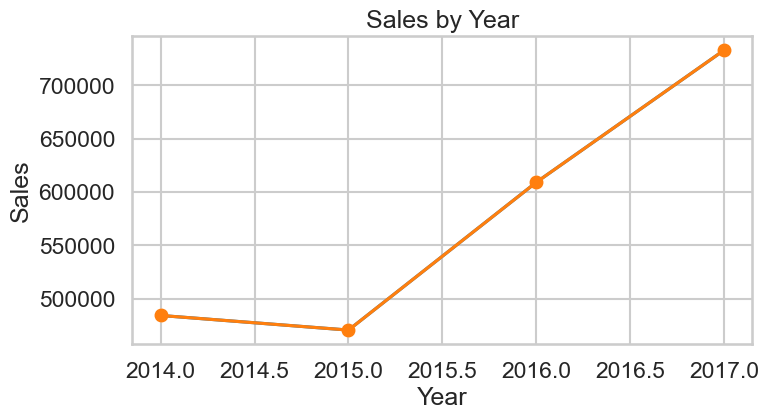

In [51]:
sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(8,4))
sns.lineplot(data=sales_by_year, x='order_year', y='Sales', marker='o')
plt.plot(sales_by_year['order_year'], sales_by_year['Sales'], marker='o')
plt.title('Sales by Year')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.savefig('sales_by_year.png')
plt.show()

# sales by category

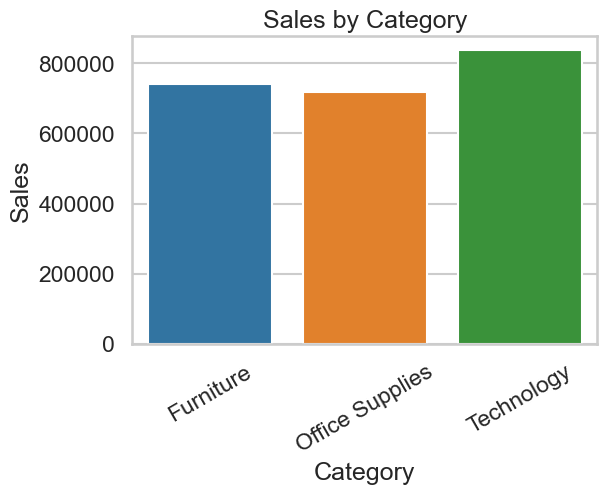

In [65]:
cat_sales = df.groupby('Category')['Sales'].sum().reset_index()
plt.figure(figsize=(6,4))
sns.barplot(data=cat_sales, x='Category', y='Sales',hue='Category')
plt.title('Sales by Category')
plt.xticks(rotation=30)
plt.savefig('sales_by_category.png')
plt.show()

# correlation heatmap

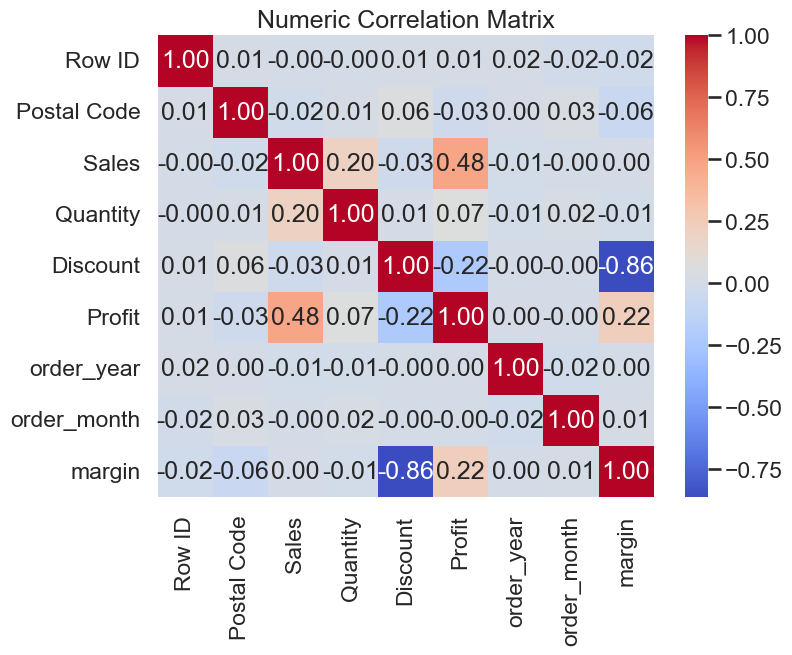

In [66]:
corr = df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Numeric Correlation Matrix')
plt.savefig('correlation.png')
plt.show()

# Sales by Sub-Category

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'Phones'),
  Text(1, 0, 'Chairs'),
  Text(2, 0, 'Storage'),
  Text(3, 0, 'Tables'),
  Text(4, 0, 'Binders'),
  Text(5, 0, 'Machines'),
  Text(6, 0, 'Accessories'),
  Text(7, 0, 'Copiers'),
  Text(8, 0, 'Bookcases'),
  Text(9, 0, 'Appliances'),
  Text(10, 0, 'Furnishings'),
  Text(11, 0, 'Paper'),
  Text(12, 0, 'Supplies'),
  Text(13, 0, 'Art'),
  Text(14, 0, 'Envelopes'),
  Text(15, 0, 'Labels'),
  Text(16, 0, 'Fasteners')])

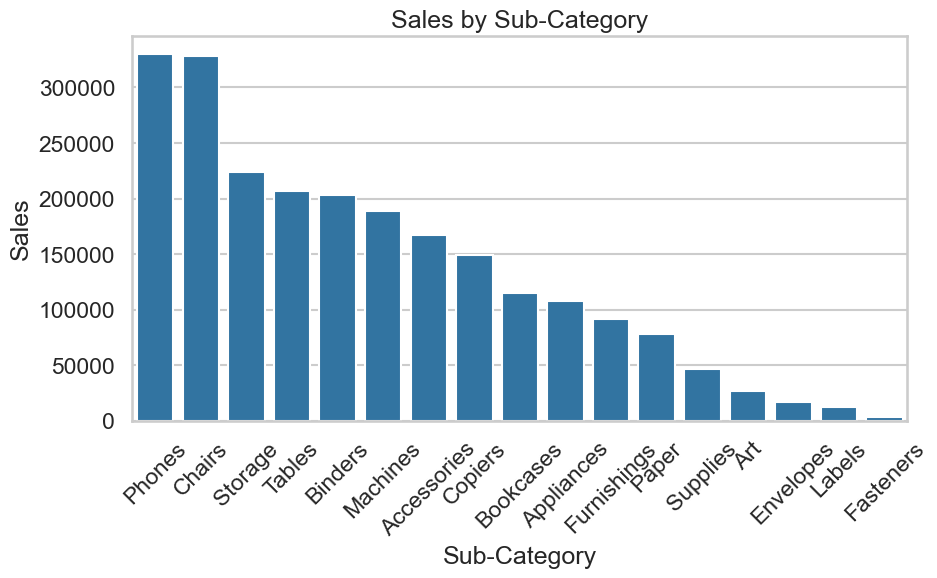

In [67]:
sub_sales = df.groupby('Sub-Category')['Sales'].sum().reset_index().sort_values('Sales', ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(data=sub_sales, x='Sub-Category', y='Sales')
plt.title("Sales by Sub-Category")
plt.savefig('sales_by_Sub_Category.png')
plt.xticks(rotation=45)

# Profit vs Discount

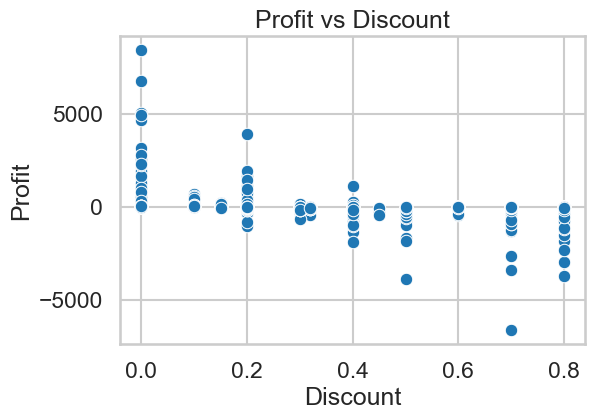

In [68]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='Discount', y='Profit')
plt.title("Profit vs Discount")
plt.savefig('Profit vs Discount.png')

# Sales by Region

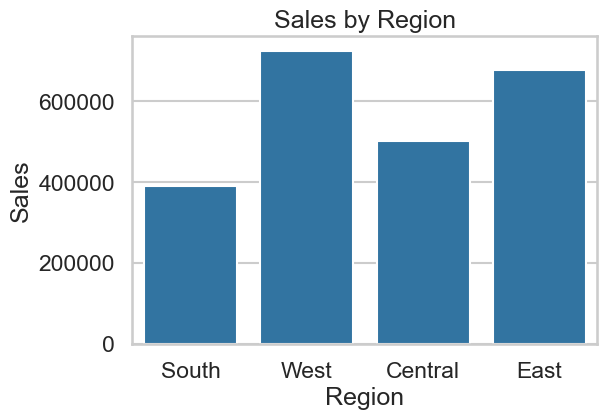

In [69]:
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='Region', y='Sales', estimator=sum,ci=None)
plt.title("Sales by Region")
plt.savefig('Sales by Region.png')
plt.show()

# Profit by Category

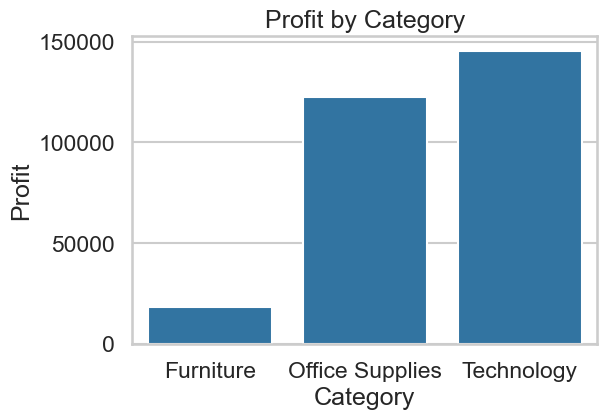

In [70]:
cat_profit = df.groupby('Category')['Profit'].sum().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(data=cat_profit, x='Category', y='Profit')
plt.title("Profit by Category")
plt.savefig('Profit by Category.png')
plt.show()

# Order by region

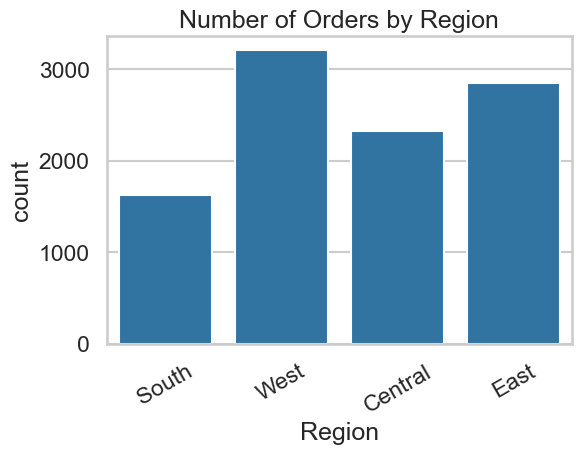

In [71]:
plt.figure(figsize=(6,4))
sns.countplot(x='Region', data=df)
plt.title('Number of Orders by Region')
plt.xticks(rotation=30)
plt.savefig('Number of Orders by Region.png')
plt.show()

# Sales vs Profit (Colored by Category)

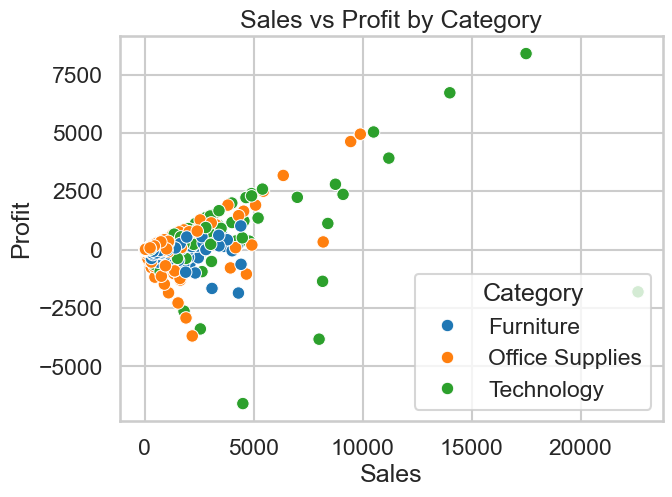

In [72]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='Sales', y='Profit', hue='Category', data=df)
plt.title('Sales vs Profit by Category')
plt.savefig('Sales vs Profit by Category.png')
plt.show()

# Sales, Profit, Discount Relationship

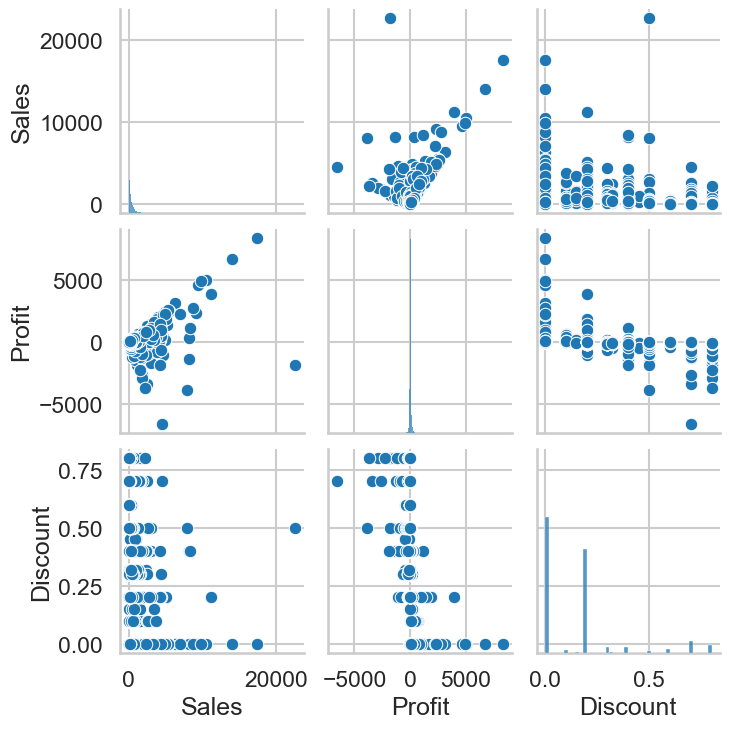

In [73]:
sns.pairplot(df[['Sales', 'Profit', 'Discount']])
plt.savefig('Sales, Profit, Discount Relationship.png')
plt.show()